# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [106]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
citi_data = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [133]:
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={api_key}'


In [108]:
response = requests.get(url)
response

<Response [200]>

In [134]:
# 
citi_counter = 1
print("Beginning Data Retrieval")
print("-----------------------------")

ran_index = random.sample(cities,500)
for citi in ran_index:
    try:
        url = f'http://api.openweathermap.org/data/2.5/weather?q={citi}&APPID={api_key}'
        response = requests.get(url)
        #print(response)
        if response.status_code != 200:
            print('City not found. Skipping...')
        print("Processing Record " + str(citi_counter) +" of Set 1 |" + citi)
        citi_counter += 1
        weather_json = response.json()
        # Append the City information into city_data list
        citi_data.append({"City": citi, 
                          "Lat": weather_json['coord']['lat'], 
                          "Lng": weather_json['coord']['lon'], 
                          "Max Temp": weather_json['main']['temp_max'],
                          "Humidity": weather_json['main']['humidity'],
                          "Cloudiness": weather_json['clouds']['all'],
                          "Wind Speed": weather_json['wind']['speed'],
                          "Country": weather_json['sys']['country'],
                          "Date": weather_json['dt']})

    except:
        print("City not found. Skipping...")
        pass
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 |mount isa
Processing Record 2 of Set 1 |tarata
Processing Record 3 of Set 1 |batavia
Processing Record 4 of Set 1 |balabac
Processing Record 5 of Set 1 |baykit
Processing Record 6 of Set 1 |santa maria
Processing Record 7 of Set 1 |mwense
Processing Record 8 of Set 1 |gigmoto
Processing Record 9 of Set 1 |mount darwin
Processing Record 10 of Set 1 |barcelona
Processing Record 11 of Set 1 |muros
Processing Record 12 of Set 1 |kodiak
Processing Record 13 of Set 1 |pasuruan
Processing Record 14 of Set 1 |yulara
Processing Record 15 of Set 1 |qaqortoq
Processing Record 16 of Set 1 |baghdad
Processing Record 17 of Set 1 |aksarka
Processing Record 18 of Set 1 |leshukonskoye
Processing Record 19 of Set 1 |katsuura
Processing Record 20 of Set 1 |cabo san lucas
Processing Record 21 of Set 1 |palmer
Processing Record 22 of Set 1 |namibe
Processing Record 23 of Set 1 |little current
City not found. Skipping...
Pr

Processing Record 176 of Set 1 |east london
Processing Record 177 of Set 1 |provideniya
Processing Record 178 of Set 1 |aranos
Processing Record 179 of Set 1 |falun
Processing Record 180 of Set 1 |komsomolskiy
Processing Record 181 of Set 1 |huilong
Processing Record 182 of Set 1 |longyearbyen
Processing Record 183 of Set 1 |avarua
Processing Record 184 of Set 1 |port elizabeth
Processing Record 185 of Set 1 |antalaha
Processing Record 186 of Set 1 |doctor juan leon mallorquin
Processing Record 187 of Set 1 |inhambane
Processing Record 188 of Set 1 |ust-tsilma
Processing Record 189 of Set 1 |batangafo
City not found. Skipping...
Processing Record 190 of Set 1 |muzquiz
City not found. Skipping...
Processing Record 191 of Set 1 |celestun
City not found. Skipping...
Processing Record 192 of Set 1 |qafsah
City not found. Skipping...
City not found. Skipping...
Processing Record 193 of Set 1 |oreanda
City not found. Skipping...
Processing Record 194 of Set 1 |imeni poliny osipenko
Processin

Processing Record 352 of Set 1 |luebo
Processing Record 353 of Set 1 |batemans bay
Processing Record 354 of Set 1 |tiksi
Processing Record 355 of Set 1 |buchanan
Processing Record 356 of Set 1 |glushkovo
Processing Record 357 of Set 1 |kano
Processing Record 358 of Set 1 |salta
Processing Record 359 of Set 1 |villa guerrero
Processing Record 360 of Set 1 |mecca
Processing Record 361 of Set 1 |kosovo polje
Processing Record 362 of Set 1 |wanxian
Processing Record 363 of Set 1 |ugoofaaru
Processing Record 364 of Set 1 |camrose
Processing Record 365 of Set 1 |hithadhoo
Processing Record 366 of Set 1 |totma
Processing Record 367 of Set 1 |vanimo
Processing Record 368 of Set 1 |bundaberg
City not found. Skipping...
Processing Record 369 of Set 1 |saryshagan
City not found. Skipping...
Processing Record 370 of Set 1 |necochea
Processing Record 371 of Set 1 |la romana
Processing Record 372 of Set 1 |lima
Processing Record 373 of Set 1 |butaritari
Processing Record 374 of Set 1 |kirkland lake


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [135]:
w_df = pd.DataFrame(citi_data)
w_df.to_csv(output_data_file, index_label = "citi_id")


In [136]:
w_df.count()

City          895
Cloudiness    895
Country       895
Date          895
Humidity      895
Lat           895
Lng           895
Max Temp      895
Wind Speed    895
dtype: int64

In [137]:
w_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,wanning,0,AT,1566944693,77,48.64,13.53,294.15,1.50
1,lyantonde,0,UG,1566944693,74,-0.41,31.15,292.90,1.49
2,ankang,69,CN,1566944693,95,32.73,108.99,290.00,0.80
3,nikolskoye,0,RU,1566944545,82,59.70,30.79,287.15,0.82
4,atambua,32,ID,1566944693,73,-9.11,124.89,297.10,6.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

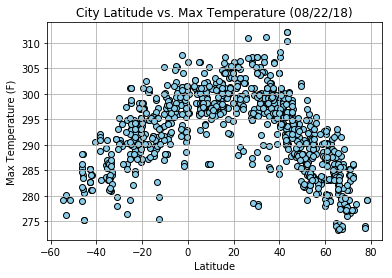

In [138]:
plt.scatter(w_df["Lat"],w_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

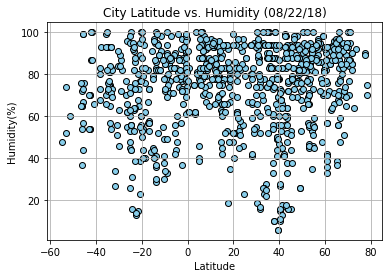

In [139]:
plt.scatter(w_df["Lat"],w_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
plt.savefig("fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

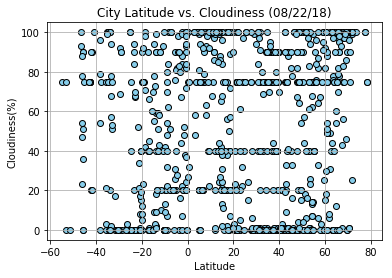

In [140]:
plt.scatter(w_df["Lat"],w_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
plt.savefig("fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

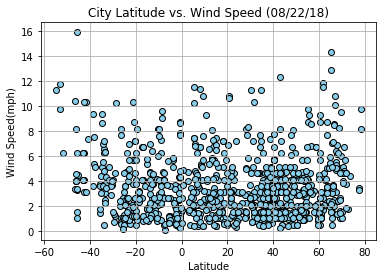

In [141]:
plt.scatter(w_df["Lat"],w_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)
plt.savefig("fig4.png")
plt.show()